In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [109]:
def p0(x):
    return np.exp(-x)

def p_g(x):
    return np.sqrt(2 / np.pi) * np.exp(-x**2/2)

In [117]:
M = 10**4

In [118]:
Xs = []

for _ in tqdm(range(M)):
    X_true = None
    while X_true is None:
        u = np.random.default_rng().random()
        X = np.random.default_rng().exponential(1)
        if u < p_g(X) / (10 * p0(X)):
            Xs.append(X)
            X_true = X

100%|██████████| 10000/10000 [00:10<00:00, 940.75it/s] 


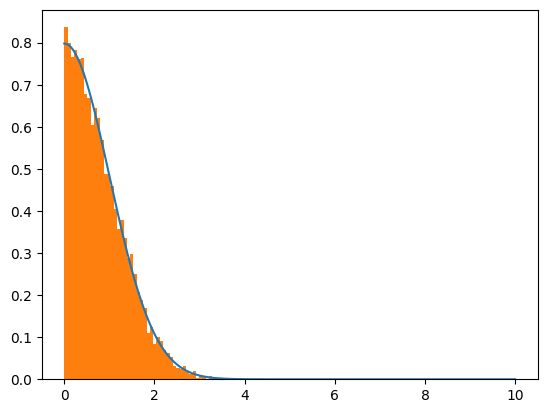

In [119]:
x = np.linspace(0, 10, 1000)

plt.plot(x, p_g(x))
plt.hist(Xs, bins=50, density=True)
plt.show()

In [157]:
def p(x):
    return 1 / np.sqrt(2*np.pi) * np.exp(-x**2/2)

def p_a(x):
    return 1 / np.sqrt(np.pi) * np.exp(-(x - 2)**2)

def f(x):
    return np.exp(-(x-4)**2 / 2)

In [158]:
x = np.random.normal(2, scale=np.sqrt(1 / 2), size=10**1)

In [159]:
avg = np.mean(f(x) * p(x) / p_a(x)) 

In [160]:
avg

0.012951112459987979

# MCMC

In [2]:
x = np.linspace(0, 20, 21)

In [4]:
def target_pdf(x):
    if x != int(x):
        return 0
    
    if x < 0 or x > 20:
        return 0
    
    return 1 / 21

In [5]:
def proposal_distribution(x, x_):
    if abs(x_ - x) == 1:
        return 1/2
    else:
        return 0

In [106]:
def get_direction():
    return 2 * np.random.binomial(1, 0.5) - 1

def MCMC(N):
    x = np.random.randint(0, 20)
    samples = []
    for _ in range(N):
        samples.append(x)

        direction = get_direction()

        if x + direction >= 0 and x + direction <= 20:
            x += direction
        else:
            x -= direction
    
    return np.array(samples)

def independant(N):
    samples = np.random.uniform(0, 20, N).astype(int)
    
    return samples

In [107]:
samples_100_mc = MCMC(100)
samples_400_mc = MCMC(400)
samples_1200_mc = MCMC(1200)
samples_10000_mc = MCMC(10000)

samples_100 = independant(100)
samples_400 = independant(400)
samples_1200 = independant(1200)
samples_10000 = independant(10000)

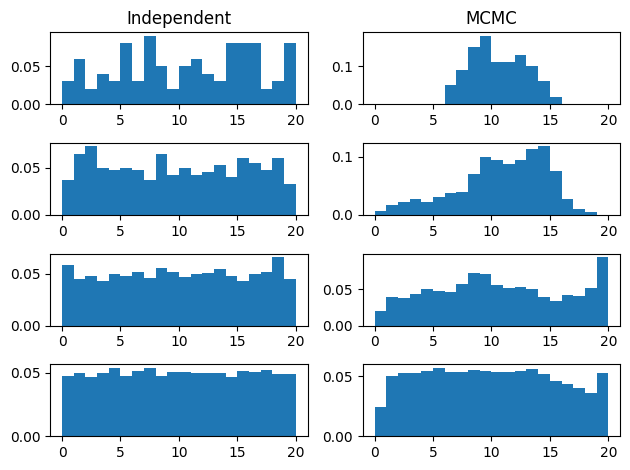

In [108]:
fig, axes = plt.subplots(4, 2)

axes[0, 0].hist(samples_100, density=True, bins=np.linspace(0, 20, 21))
axes[0, 0].set_title('Independent')
axes[0, 1].hist(samples_100_mc, density=True, bins=np.linspace(0, 20, 21))
axes[0, 1].set_title('MCMC')

axes[1, 0].hist(samples_400, density=True, bins=np.linspace(0, 20, 21))
axes[1, 1].hist(samples_400_mc, density=True, bins=np.linspace(0, 20, 21))

axes[2, 0].hist(samples_1200, density=True, bins=np.linspace(0, 20, 21))
axes[2, 1].hist(samples_1200_mc, density=True, bins=np.linspace(0, 20, 21))

axes[3, 0].hist(samples_10000, density=True, bins=np.linspace(0, 20, 21))
axes[3, 1].hist(samples_10000_mc, density=True, bins=np.linspace(0, 20, 21))

plt.tight_layout()
plt.show()